## Imports

In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt
from matplotlib.image import imread
from PIL import Image, ImageOps

## Define MNIST categories

In [2]:
class FashionCategories:

    def __init__(self):
        self.categories = {0: 'T-shirt/top', 1 : 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot' }
        
    def __str__(self):
        retstr = 'Categories:\n'
        for label, clothing in self.categories.items():
            retstr += str(label) + ': ' + clothing + '\n'
        return retstr
    
categories = FashionCategories()

## Read in data

Layout
Images: (30175, 80, 60, 3)
Lables: (30175, 1)

Examples


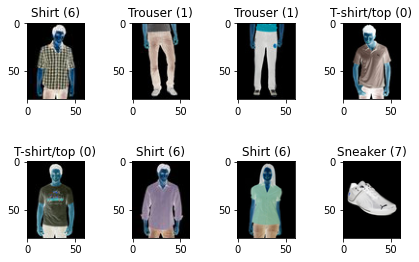

In [3]:
im_arr = np.load('imagesFashionImages.npy')
label_arr = np.load('labelsFashionImages.npy')

print("Layout")
print("Images: {}".format(im_arr.shape))
print("Lables: {}".format(label_arr.shape))
print()
print("Examples")

fig, axs = plt.subplots(2, 4)
fig.tight_layout()
for i, ax in enumerate(axs.flat):
    ax.imshow(im_arr[i])
    ax.set_title(str(categories.categories[label_arr[i,0]]) + ' (' + str(int(label_arr[i,0])) +')')
plt.show()

## Loading class for pytorch

In [25]:
class FashionImgData(Dataset):
    """User defined class to build a datset using Pytorch class Dataset."""
    
    def __init__(self, image_data, label_data, transform = None):
        """Method to initilaize variables.""" 
        self.transform = transform
        self.labels = label_data
        # Dimension of Images = 28 * 28 * 3. where height = width = 28 and color_channels = 3.
        self.images =  image_data

    def __getitem__(self, index):
        label = self.labels[index]
        image = self.images[index]
        
        if self.transform is not None:
            image = self.transform(image)

        return image, label

    def __len__(self):
        return len(self.images)

## Define custom transforms and create loaders:

In [26]:
mnist_transforms = transforms.Compose([
    transforms.ToTensor(),
   transforms.Grayscale(),
   transforms.Resize((28,28))])

fashion_data = FashionImgData(im_arr, label_arr, mnist_transforms)
print("Number of samples: {}".format(len(fashion_data.images)))
fashionloader = DataLoader(dataset=fashion_data, batch_size = 100, shuffle = False)

print("Train data shape: ")
for i, (images, labels) in enumerate(fashionloader):
    print(images.shape, labels.shape)
    if i == 5: #print only first 10
        break

Number of samples: 30175
Train data shape: 
torch.Size([100, 1, 28, 28]) torch.Size([100, 1])
torch.Size([100, 1, 28, 28]) torch.Size([100, 1])
torch.Size([100, 1, 28, 28]) torch.Size([100, 1])
torch.Size([100, 1, 28, 28]) torch.Size([100, 1])
torch.Size([100, 1, 28, 28]) torch.Size([100, 1])
torch.Size([100, 1, 28, 28]) torch.Size([100, 1])


Examples grayscale:


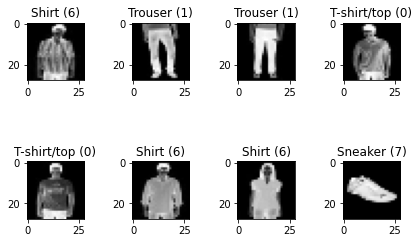

In [29]:
def display(loader, categories):
    example = iter(loader)
    images, labels = example.next()
    for i in range(4):
        plt.subplot(1, 4 ,i+1)
        plt.imshow(images[i][0], cmap= 'gray')
        label = str(categories.categories[labels[i].item()]) + ' (' + str(int(labels[i+5].item())) +')'
        plt.xlabel(label)
    plt.show()
 
#display(fashionloader, categories)
print("Examples grayscale:")
example = iter(fashionloader)
images, labels = example.next()
fig, axs = plt.subplots(2, 4)
fig.tight_layout()
for i, ax in enumerate(axs.flat):
    ax.imshow(images[i][0], cmap= 'gray')
    ax.set_title(str(categories.categories[labels[i].item()]) + ' (' + str(int(labels[i].item())) +')')
plt.show()